##Hill and Valley Prediction using Logistics Regression

##Get Understanding about Data set

each record represents 100 points on a two dmension graph.when plotted in order (from 1 through 100)as the Y coordinate,the points will create either a Hill(a 'bump' in the terrian)or a valley(a 'dip' in the terrian).see the original source for some examples of these graphs.
1-100 labeled"yes.floating point values(numeric),the X-values
101 labeled"class".Binary(0,1)representing(valley,hill)

---



##import library

In [1]:
import pandas as pd

In [3]:
import numpy as np


##Import CSV as DataFrame

In [4]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Hill%20Valley%20Dataset.csv')

In [6]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0


In [7]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100',
       'Class'],
      dtype='object', length=101)

In [8]:
print(df.columns.tolist())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'Class']


In [12]:
df.shape

(1212, 101)

In [15]:
df['Class'].value_counts()

0    606
1    606
Name: Class, dtype: int64

In [16]:
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
Class,,,,,,,,,,,,,,,,,,,,,
0,7913.333251,7825.339967,7902.497294,7857.032079,7775.610198,7875.436337,7804.166584,7722.324802,7793.328416,7686.782046,...,7753.427244,7737.843366,7799.332079,7825.211700,7791.354010,7927.237112,7874.502343,7844.227459,7875.338713,7855.181172
1,8424.850512,8463.272558,8482.810182,8496.705396,8480.984224,8470.623680,8572.998911,8644.958284,8516.011716,8554.753102,...,8478.513399,8502.270264,8452.502739,8492.375924,8490.416832,8499.724109,8496.685660,8436.163251,8510.583069,8457.213581


In [17]:
y = df['Class']

In [18]:
y.shape

(1212,)

In [19]:
y

0       0
1       1
2       1
3       0
4       0
       ..
1207    1
1208    0
1209    1
1210    1
1211    0
Name: Class, Length: 1212, dtype: int64

In [21]:
x = df.drop('Class',axis=1)

In [23]:
x.shape

(1212, 100)

In [24]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,37.57,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.71,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,69384.71,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,47653.60,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.52,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,13.00,12.87,13.27,13.04,13.19,12.53,14.31,13.33,13.63,14.55,...,12.89,12.48,12.15,13.15,12.35,13.58,13.86,12.88,13.87,13.51
1208,48.66,50.11,48.55,50.43,50.09,49.67,48.95,48.65,48.63,48.61,...,47.45,46.93,49.61,47.16,48.17,47.94,49.81,49.89,47.43,47.77
1209,10160.65,9048.63,8994.94,9514.39,9814.74,10195.24,10031.47,10202.28,9152.99,9591.75,...,10413.41,9068.11,9191.80,9275.04,9848.18,9074.17,9601.74,10366.24,8997.60,9305.77
1210,34.81,35.07,34.98,32.37,34.16,34.03,33.31,32.48,35.63,32.48,...,33.18,32.76,35.03,32.89,31.91,33.85,35.28,32.49,32.83,34.82


In [25]:
import matplotlib.pyplot as plt

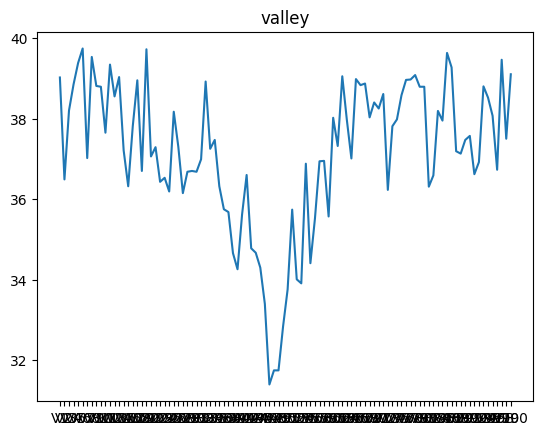

In [27]:
plt.plot(x.iloc[0,:])
plt.title('valley');

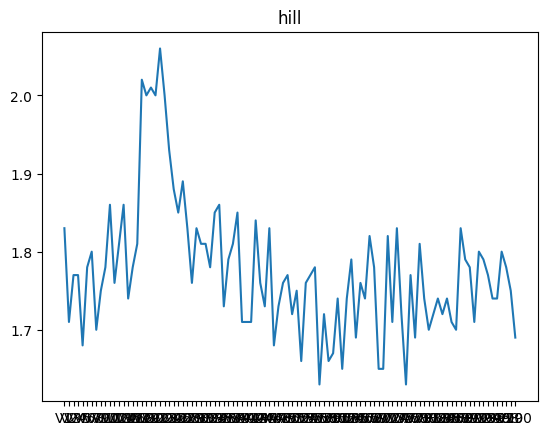

In [29]:
plt.plot(x.iloc[1,:])
plt.title('hill');

#Get X variables Standardlized

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave
badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.
Next approach is go for MinMax Scaler

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
ss=StandardScaler()

In [33]:
x = ss.fit_transform(x)

In [34]:
x

array([[-0.45248681, -0.45361784, -0.45100881, ..., -0.45609618,
        -0.45164274, -0.45545496],
       [-0.45455665, -0.45556372, -0.45302369, ..., -0.45821768,
        -0.45362255, -0.45755405],
       [ 3.33983504,  3.24466709,  3.58338069, ...,  3.5427869 ,
         3.27907378,  3.74616847],
       ...,
       [ 0.11084204,  0.0505953 ,  0.04437307, ...,  0.12533312,
         0.04456025,  0.06450317],
       [-0.45272112, -0.45369729, -0.45118691, ..., -0.45648861,
        -0.45190136, -0.45569511],
       [ 0.01782872, -0.02636986,  0.05196137, ...,  0.03036056,
         0.01087365,  0.03123129]])

In [35]:
x.shape

(1212, 100)

#Get train test split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.3,stratify= y ,random_state=2529)

In [41]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((848, 100), (364, 100), (848,), (364,))

#get model train

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr = LogisticRegression()

In [44]:
lr.fit(x_train,y_train)

LogisticRegression()

#get model predicition

In [46]:
y_pred = lr.predict(x_test)

In [47]:
y_pred.shape

(364,)

In [48]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,

# get probability of each predicted class

In [49]:
lr.predict_proba(x_test)


array([[0.56336744, 0.43663256],
       [0.50327039, 0.49672961],
       [0.57446514, 0.42553486],
       [0.50737525, 0.49262475],
       [0.50767478, 0.49232522],
       [0.5087066 , 0.4912934 ],
       [0.50793217, 0.49206783],
       [0.60357917, 0.39642083],
       [0.51009655, 0.48990345],
       [0.50964836, 0.49035164],
       [0.50721213, 0.49278787],
       [0.51503419, 0.48496581],
       [0.93595857, 0.06404143],
       [0.50968822, 0.49031178],
       [0.52004959, 0.47995041],
       [0.73731198, 0.26268802],
       [0.47389171, 0.52610829],
       [0.50781847, 0.49218153],
       [0.50862145, 0.49137855],
       [0.5086342 , 0.4913658 ],
       [0.29771935, 0.70228065],
       [0.38273299, 0.61726701],
       [0.50865396, 0.49134604],
       [0.28367974, 0.71632026],
       [0.50873182, 0.49126818],
       [0.50707761, 0.49292239],
       [0.50896136, 0.49103864],
       [0.50811697, 0.49188303],
       [0.50861558, 0.49138442],
       [0.5074842 , 0.4925158 ],
       [0.

#get model evaluation

In [50]:
from sklearn.metrics import confusion_matrix,classification_report

In [51]:
print(confusion_matrix(y_test,y_pred))

[[181   1]
 [106  76]]


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77       182
           1       0.99      0.42      0.59       182

    accuracy                           0.71       364
   macro avg       0.81      0.71      0.68       364
weighted avg       0.81      0.71      0.68       364



#get future predicitions

Lets select a random sample from existing dataset as new value
Steps to follow
1. Extract a random row using sample function
2. Separate X and y
3. Standardize X
4. Predict

In [53]:
x_new = df.sample(1)

In [54]:
x_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
829,3388.7,3556.13,3677.03,3396.48,3384.18,3358.15,3379.05,3046.05,3535.0,3296.28,...,3622.53,2992.56,3604.58,3438.49,3631.02,3081.12,3413.88,3251.08,3497.9,1


In [55]:
x_new.shape

(1, 101)

In [56]:
x_new = x_new.drop('Class',axis = 1)

In [57]:
x_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
829,3388.7,3556.13,3677.03,3396.48,3384.18,3358.15,3379.05,3046.05,3535.0,3296.28,...,3191.02,3622.53,2992.56,3604.58,3438.49,3631.02,3081.12,3413.88,3251.08,3497.9


In [58]:
x_new.shape

(1, 100)

In [59]:
x_new = ss.fit_transform(x_new)

In [60]:
y_pred_new = lr.predict(x_new)

In [61]:
y_pred_new

array([1])

In [62]:
lr.predict_proba(x_new)

array([[0.49714993, 0.50285007]])